<img src="./files/Lasso Regression with sklearn.png"
     alt="Lasso Regression with sklearn"
     style="float: left; margin-right: 10px;" />

____________________________________________________________________________________________________
# <center><span style="color:Purple">Hello this is, *Ridge Regression with sklearn*</span>. 🤖💻
____________________________________________________________________________________________________

## Setting Up the Working Environment 🛠️

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Importing Datasets 📖

In [2]:
import warnings
warnings.filterwarnings('ignore')
# ---------------------------------

from sklearn.datasets import load_boston

## The Working Dataset 🔎

In [3]:
X  = load_boston().data
y = load_boston().target

In [4]:
## Creating a data frame for later use
boston = pd.DataFrame(X, y, columns=load_boston().feature_names)
boston['Price'] = y
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Importing Lasso Regression sub_module 🧲

In [5]:
# Import Lasso 
from sklearn.linear_model import Lasso

In [6]:
# Instantiate Lasso object, set alpha to 0.1 and normalize to True
lasso_reg = Lasso(alpha = 0.1, normalize = True)

## Lasso Regression Parameters 📐

In [7]:
lasso_reg.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## Fiting Lasso Regression ⚙️

In [8]:
# Fit Lasso Regression
lasso_reg.fit(X, y)

Lasso(alpha=0.1, normalize=True)

In [9]:
## Check the results
feature_names = boston.drop('Price', axis = 1).columns

lasso_coef = lasso_reg.coef_

pd.DataFrame(list(zip(feature_names, lasso_coef)), 
             columns = ['Feature_names', 'Estimates'])

,Feature_names,Estimates
0,CRIM,-0.000000
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.954695
6,AGE,-0.000000
7,DIS,0.000000
8,RAD,-0.000000
9,TAX,-0.000000


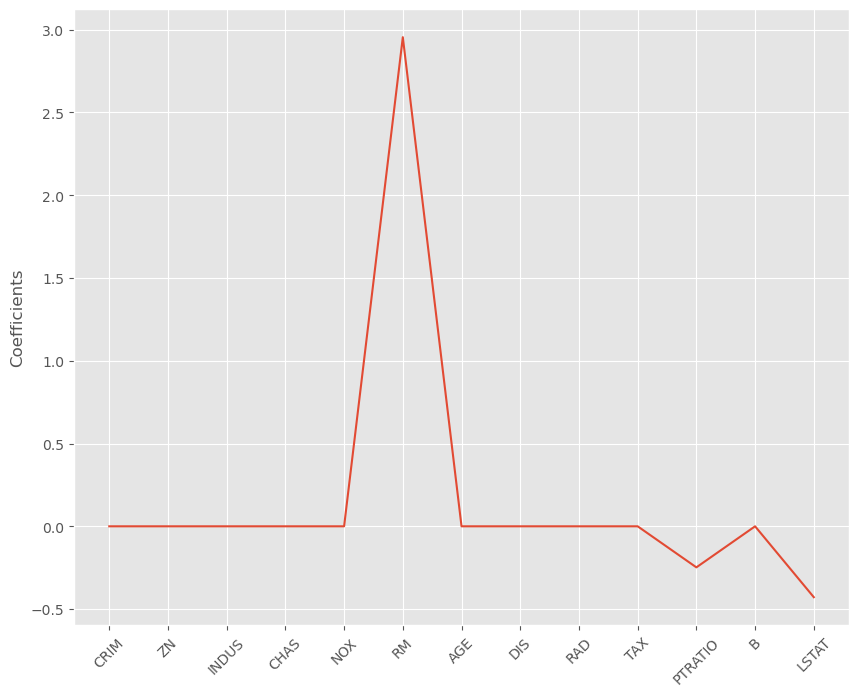

In [10]:
## Plot the lasso coefficients 
plt.figure(figsize=(10, 8))
plt.plot(range(len(feature_names)), lasso_coef)
plt.xticks(range(len(feature_names)),
                feature_names.values, 
                rotation = 45)
plt.ylabel('Coefficients')
plt.show()

## Training Lasso Regression with Train/Test split 🥇

In [11]:
X  = load_boston().data
y = load_boston().target

In [12]:
# Split the data set into train and test sets using 75% for Training 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10123)

## Train Lasso model with alpha = 0.1 ⚙️

In [13]:
# Import Lasso 
from sklearn.linear_model import Lasso

In [14]:
# Instantiate Lasso object
lasso_reg = Lasso(alpha = 0.1)

In [15]:
# Fit the model on the training set
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [16]:
# Print the results both on training and test set
print('The  R^2 score on training set:{:.4f}'.format(lasso_reg.score(X_train, y_train) * 100))


print('The R^2 score on test set: {:.4f}'.format(lasso_reg.score(X_test, y_test)*100))

The  R^2 score on training set:74.9519
The R^2 score on test set: 64.8656


## Fitting Lasso Regression with a range of alpha values 

In [17]:
alphas = (0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10)

coeffs = []
train_r_squared = []
test_r_squared = []

In [18]:
# Fit lasso regression over each alpha value
for i in alphas:    
    lasso = Lasso(alpha = i)
    lasso.fit(X_train, y_train)

    coeffs.append(lasso.coef_)
    
    train_r_squared.append(lasso.score(X_train, y_train))
    test_r_squared.append(lasso.score(X_test, y_test))

## Plotting The R^2 of Train and Test sets 🪶

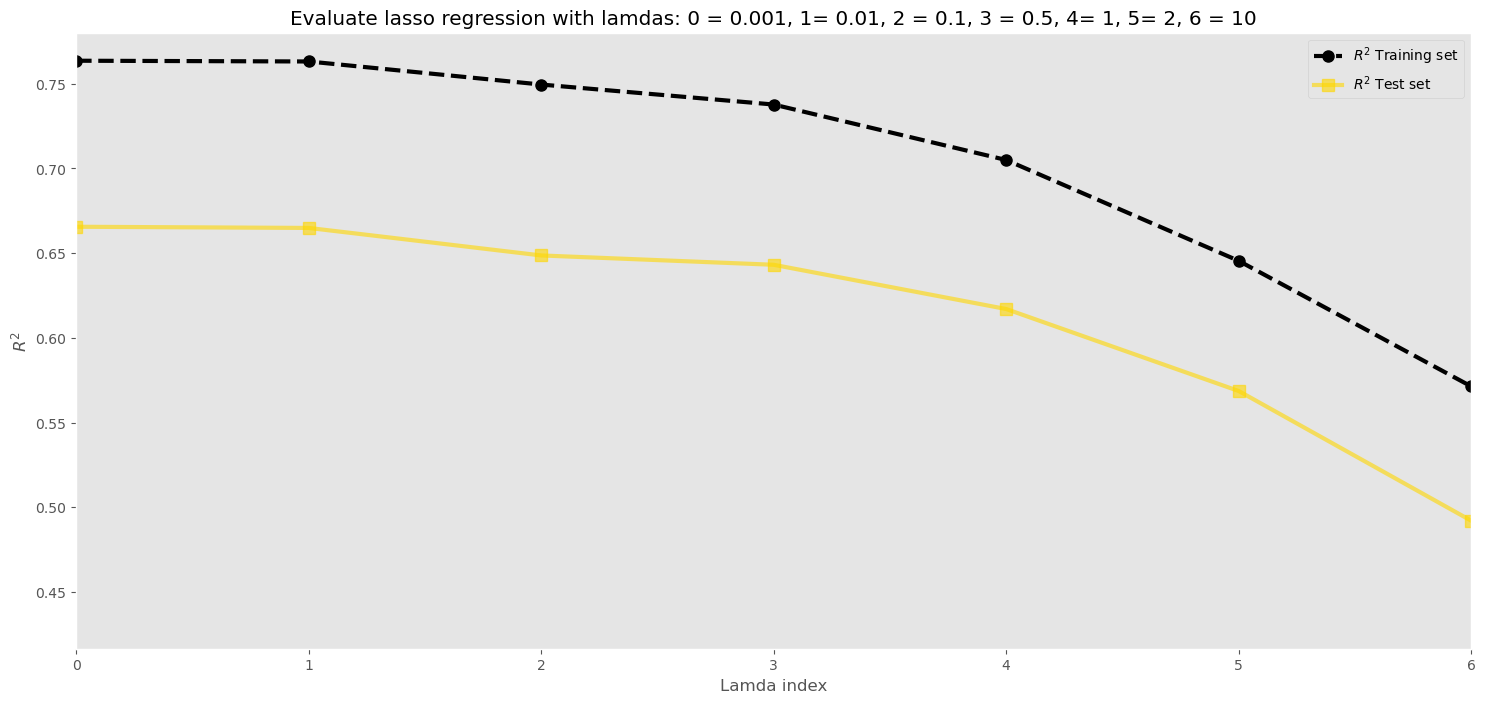

In [19]:
# Plotting
plt.figure(figsize = (18, 8))

plt.plot(train_r_squared, 'bo',
         linestyle = 'dashed',
         label = r'$R^2$ Training set',
         color = "black",
         linewidth = 3,
         markersize = 8)

plt.plot(test_r_squared, marker = 's',
         label = r'$R^2$ Test set',
         color = "gold", 
         alpha = 0.6, 
         linewidth = 3, 
         markersize = 8)


plt.xlabel('Lamda index')
plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')

plt.legend(loc = 'best')
plt.grid()

## Lasso Hyper Parameter Tuning 🔗

In [20]:
X = load_boston().data
y = load_boston().target

In [21]:
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [22]:
# Setup the hyperparameter grid
alphas = (0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10)
param_grid = {'alpha': alphas}

In [23]:
# Instantiate ridge regression 
lasso_reg = Lasso(normalize = True)

In [24]:
# Instantiate GridSearchCV object with 5 folds
lasso_cv = GridSearchCV(estimator = lasso_reg, 
                       param_grid = param_grid, 
                       cv = 5)

In [25]:
# Fit it to the data
lasso_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameter: {}".format(lasso_cv.best_params_)) 
print("Ridge Regression Best score is {}".format(lasso_cv.best_score_))

Tuned Ridge Regression Parameter: {'alpha': 0.01}
Ridge Regression Best score is 0.40242565909986255


__________________________________________________________________
# <span style="color:Purple">End The Project, *Thank you*</span> 🔚🥀
__________________________________________________________________